In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'/Users/sot/Downloads/LAPTOP.csv')
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [5]:
data = df[['ram','storage','screen','final_price']]

In [6]:
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


## EDA

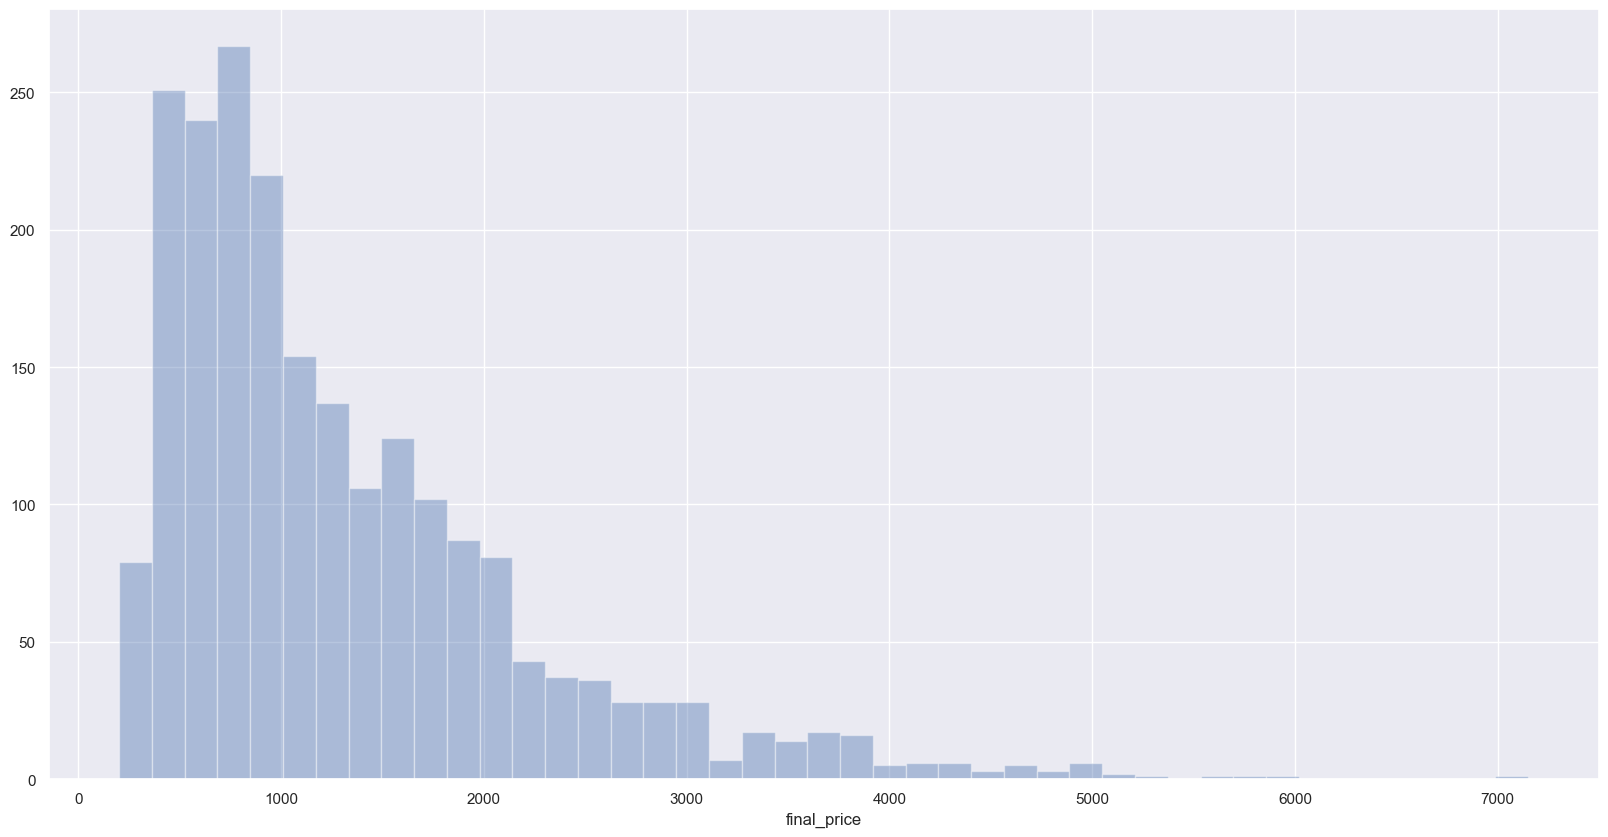

In [7]:
plt.figure(figsize = (20,10))
sns.distplot(data['final_price'],kde = False);

#####  The final_price column has a long tail 

##  QUESTION 1
-- There's one column with missing values. What is it?

In [8]:
data.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [9]:
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


## QUESTION 2
-- What's the median (50% percentile) for variable 'ram'?

In [10]:
data['ram'].median()

16.0

In [11]:
x = data.drop(['final_price'], axis = 1)
y = data['final_price']

In [25]:
#Filling na with 0
X = x.fillna(0)


In [28]:
#filling na with mean

XX = x.fillna(x['screen'].mean())


In [30]:
XX.isna().sum()

ram        0
storage    0
screen     0
dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

# fillna with 0 split

X_train, X_first_test, y_train, y_first_test = train_test_split(X, y, test_size=0.40, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_first_test, y_first_test, test_size=0.5, random_state=42)

In [37]:
#fillna with mean split

X_trainn, X_first_testt, y_trainn, y_first_testt = train_test_split(XX, y, test_size=0.40, random_state=42)
X_vall, X_testt, y_vall, y_testt = train_test_split(X_first_testt, y_first_testt, test_size=0.5, random_state=42)

In [33]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
X_train

,ram,storage,screen
1357,16,2000,17.3
1055,4,32,11.6
513,16,1000,14.0
81,16,512,15.6
1803,16,1000,15.6
...,...,...,...
1638,8,512,15.0
1095,8,256,15.6
1130,8,256,13.3
1294,8,512,14.0


In [35]:
# linear regression with 0
from sklearn.linear_model import LinearRegression


linear1 = LinearRegression()
linear1.fit(X_train, y_train)


LinearRegression()

In [38]:
linear_fillna0 = linear1.predict(X_val)

In [40]:
# evaluation  of fillna with 0

from sklearn.metrics import mean_absolute_error,mean_squared_error

lr0_rmse = np.sqrt(mean_squared_error(y_val,linear_fillna0))
lr0_rmse

609.4180917833916

In [46]:

rounded_score = round(lr0_rmse, 2)
print(rounded_score)


609.42


In [41]:
# linear regression with mean
from sklearn.linear_model import LinearRegression


linear2 = LinearRegression()
linear2.fit(X_trainn, y_trainn)

LinearRegression()

In [42]:
linear_fillnamean = linear1.predict(X_vall)

In [45]:
# evaluation  of fillna with mean

lrmean_rmse = np.sqrt(mean_squared_error(y_vall,linear_fillnamean))
lrmean_rmse

610.1628943411372

In [47]:
rounded_score = round(lrmean_rmse, 2)
print(rounded_score)



610.16


### REGULARISATION MODEL (ridge,lasso,elasticnet)

In [49]:
from sklearn.linear_model import Ridge

In [50]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rounded_rmse = round(rmse, 2)
    rmse_scores.append((r, rounded_rmse))


best_r, best_rmse = min(rmse_scores, key=lambda x: (x[1], x[0]))

for r, rmse in rmse_scores:
    print(f"r: {r}, RMSE: {rmse}")

print(f"\nThe best r is {best_r} with an RMSE of {best_rmse}")


r: 0, RMSE: 609.42
r: 0.01, RMSE: 609.42
r: 0.1, RMSE: 609.42
r: 1, RMSE: 609.42
r: 5, RMSE: 609.42
r: 10, RMSE: 609.43
r: 100, RMSE: 609.53

The best r is 0 with an RMSE of 609.42


### Trying different seeds without a regularization model

In [51]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seed_values:

    X_train, X_temp, y_train, y_temp = train_test_split(x.fillna(0), y, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=seed)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)

std_rmse = np.std(rmse_scores)
rounded_std_rmse = round(std_rmse, 3)
print(f"RMSE scores: {rmse_scores}")
print(f"Standard deviation of RMSE scores: {rounded_std_rmse}")


RMSE scores: [594.9686798321051, 566.0379922963667, 634.2058256834982, 571.3955969105705, 618.2281658884198, 534.8495771754357, 604.4943997112462, 666.1363056498916, 586.2399089252507, 622.5141205609004]
Standard deviation of RMSE scores: 35.825


### Trying the seed of 9 and r of 0.001 with a regularization model

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [56]:
modell = Ridge(alpha=0.001)
modell.fit(X_train, y_train)

Ridge(alpha=0.001)

In [57]:
y_predd = modell.predict(X_test)

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_predd))

In [59]:
rmse

535.080599150821

In [60]:
rounded_score = round(rmse, 2)
print(rounded_score)

535.08
